#Crop Recommendation System

**Goal**- The goal is to recommend the most suitable crops to grow in a particular farm based on various parameters and environmental statistics.

In [139]:
#importing libraries

import numpy as np
import pandas as pd

In [140]:
#importing dataset

crop = pd.read_csv("/content/Crop_recommendation.csv")
crop.shape

(2200, 8)

In [141]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**About Data**:

*  We have 2200 rows and 8 columns in the dataset

* All values in the data are numberical except for the label data.

**Data fields**


*  N - ratio of Nitrogen content in soil
*  P - ratio of Phosphorous content in soil

*  K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
*  humidity - relative humidity in %

* ph - ph value of the soil
* rainfall - rainfall in mm








## Exploratory Data Analysis

In [142]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

Note that the output/label is categorical. Therefore this is classification problem

In [143]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [144]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [145]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [146]:
crop.duplicated().sum()

0

In [147]:
crop.corr()

<ipython-input-147-a94158be47ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Visual Exploratory Data Analysis

<ipython-input-148-3cf05d7e3e11>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop.corr(), annot=True,cbar=True, cmap='coolwarm')


<Axes: >

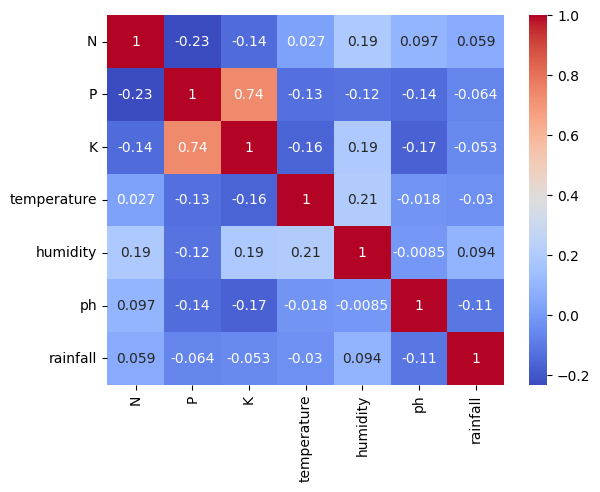

In [148]:
import seaborn as sns
sns.heatmap(crop.corr(), annot=True,cbar=True, cmap='coolwarm')

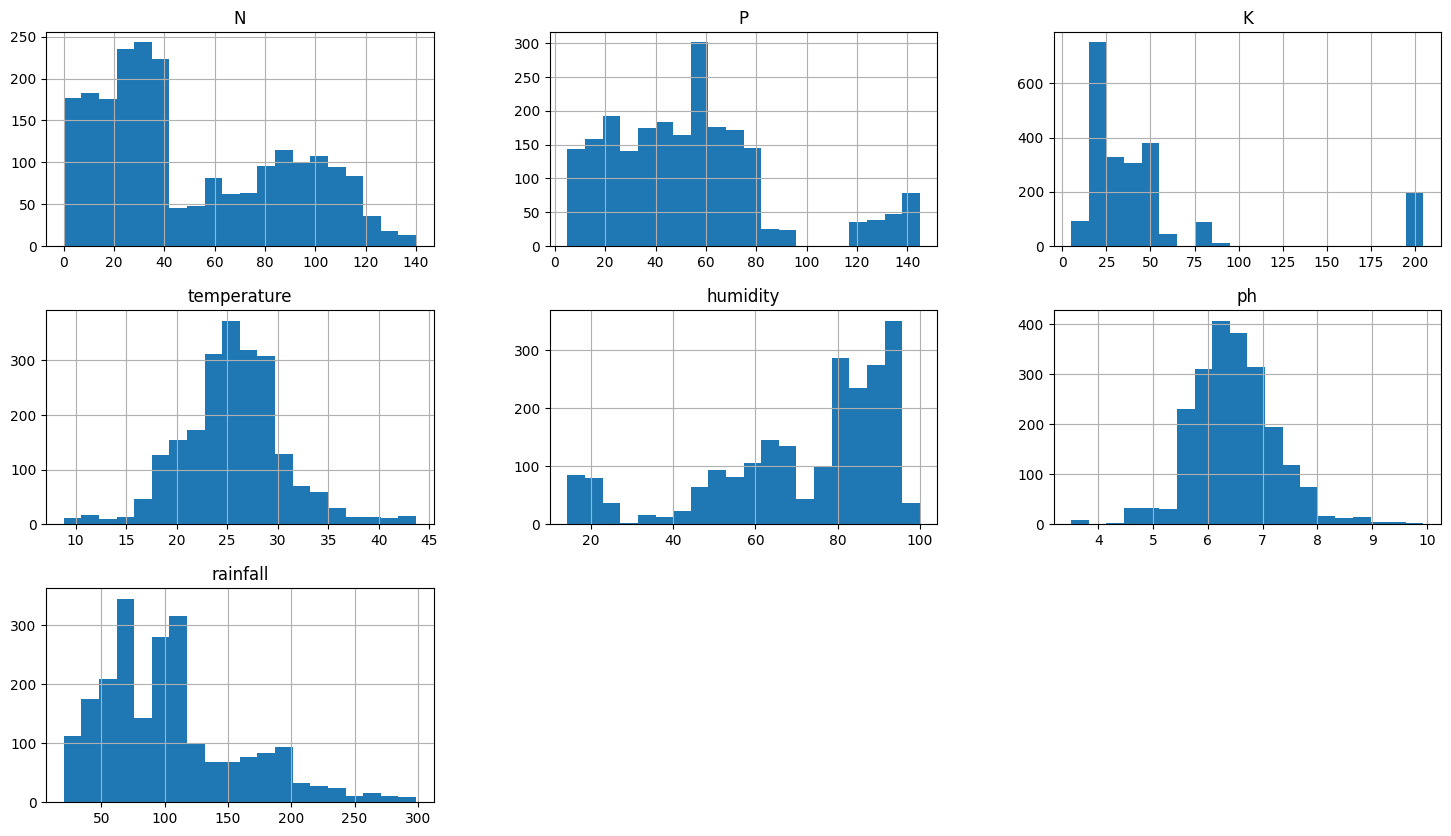

In [149]:
import matplotlib.pyplot as plt
crop.hist(['N' , 'P' , 'K' , 'temperature' , 'humidity' , 'ph' , 'rainfall'] ,bins=20, figsize=(18,10))

plt.show()

**Histogram Interpretation**

Histograms shows us the data distribution for a single continuous variable.


* The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "temperature", there are around 600 rows in data that has a temeperature between 25 to 30.

* The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

* We can see there are rows having high P and K values. We will check if they are outliers or not.


Label Encoding

In [150]:
crop_dict ={
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee':22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [151]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [152]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [153]:
crop.drop('label',axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


**Train test split**

In [154]:
#input columns
x=crop.drop('crop_num',axis=1)
#output columns
y=crop['crop_num']

In [155]:
x.shape

(2200, 7)

In [156]:
y.shape

(2200,)

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [159]:
x_train.shape

(1760, 7)

In [160]:
x_test.shape

(440, 7)

**Scaling the features**

1. Using MinMaxScaler

     -  Used to ransform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one



In [161]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

ms.fit(x_train)
x_train =ms.transform(x_train)
x_test=ms.transform(x_test)

In [162]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

  2. Using Standardization

      The StandardScaler is a method of standardizing data such the the transformed feature has 0 mean and and a standard deviation of 1.

      This scaler normalizes the data by subtracting the mean and dividing by the standard deviation.


In [163]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit(x_train)
x_train =sc.transform(x_train)
x_test=sc.transform(x_test)

In [164]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

##Training Models

In [165]:
#importing ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
models ={
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Supoort Vector Machine':SVC(),
    'K-Nearest Neighbour':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Bagging':BaggingClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
}
max=0
efficient_model=None
for name, md in models.items():
  md.fit(x_train,y_train)
  ypred=md.predict(x_test)
  print("\n")
  print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test,ypred)}")
  print(f"{name} Accuracy:{accuracy_score(y_test,ypred)}")
  print(f"{name} Precision:{precision_score(y_test,ypred,average='weighted')}")
  print(f"{name} Recall:{recall_score(y_test,ypred,average='weighted')}")
  print(f"{name} f1_score:{f1_score(y_test,ypred,average='weighted')}")
  if f1_score(y_test,ypred,average='weighted') > max:
    max=f1_score(y_test,ypred,average='weighted')
    efficient_model=name

print(f"Efficient Model is:{efficient_model}")



Logistic Regression Confusion Matrix:
[[15  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 20  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Gradient Boosting Confusion Matrix:
[[15  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0 

Note that Naiive Bayes is more accurate, so here we will finalize Naive bayes

In [166]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
NB=GaussianNB()
NB.fit(x_train,y_train)
ypred=NB.predict(x_test)
print(f"Confusion Matrix:{confusion_matrix(y_test,ypred)}")
print(f"Accuracy:{accuracy_score(y_test,ypred)}")
print(f"Precision:{precision_score(y_test,ypred, average='weighted')}")
print(f"Recall:{recall_score(y_test,ypred,average='weighted')}")
print(f"F1-Score:{f1_score(y_test,ypred,average='weighted')}")

Confusion Matrix:[[17  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

**Recommendation System**

In [167]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
  features=np.array([[N,P,k,temperature,humidity,ph,rainfall]])
  prediction= NB.predict(features).reshape(1,-1)
  return prediction[0]

In [168]:
# Calling the function for some new data
N=50
P=30
K=20
temperature=44.0
humidity=40
ph=330
rainfall=50

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)
crop_dict={1:'rice',2:'maize',3:'jute',4:'cotton',5:'coconut',
           6:'papaya',7:'orange',8:'apple',9:'muskmelon',10:'watermelon',
           11:'grapes',12:'mango',13:'banana',14:'pomegranate',15:'lentil',
           16:'blackgram',17:'mungbean',18:'mothbeans',19:'pigeonpeas',
           20:'kidneybeans',21:'chickpea',22:'coffee'
}

if predict[0] in crop_dict:
  crop=crop_dict[predict[0]]
  print(f"{crop} is a best crop to be cultivated")
else:
  print("Sorry we are not able to recommend a proper crop for this environment")


mothbeans is a best crop to be cultivated


In [170]:
import pickle
pickle.dump(NB,open('model.pkl','wb'))